#Solucion del dataset

> Add blockquote



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar datos
df = pd.read_excel('/content/drive/MyDrive/csv datascience/data.xlsx')

In [5]:
df.isnull().sum()

,0
GpsProvider,953
BookingID,0
Market/Regular,0
BookingID_Date,0
vehicle_no,0
Origin_Location,0
Destination_Location,0
Org_lat_lon,0
Des_lat_lon,0
Data_Ping_time,953


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

In [7]:
df.drop(columns=["GpsProvider", "Data_Ping_time", "Current_Location","DestinationLocation", "Curr_lat", "Curr_lon", "Driver_MobileNo", "DestinationLocation_Code"], inplace=True)

In [8]:
df["ontime"] = df["ontime"].fillna("R")
df.drop(columns=["delay"], inplace=True)

In [9]:
df["ontime"].head()

,ontime
0,R
1,G
2,G
3,G
4,G


In [10]:
df_null = df["OriginLocation_Code"].isnull()
df_null.head()

,OriginLocation_Code
0,False
1,False
2,False
3,False
4,False


In [11]:
# Mostrar todas las filas donde la columna 'OriginLocation_Code' tiene valores nulos
filas_con_nulos = df[df['OriginLocation_Code'].isnull()]
print(filas_con_nulos.to_markdown(index=False, numalign="left", stralign="left"))

| BookingID    | Market/Regular    | BookingID_Date      | vehicle_no   | Origin_Location              | Destination_Location                  | Org_lat_lon         | Des_lat_lon         | Planned_ETA         | actual_eta                 | ontime   | OriginLocation_Code   | trip_start_date     | trip_end_date       | TRANSPORTATION_DISTANCE_IN_KM   | vehicleType                 | Minimum_kms_to_be_covered_in_a_day   | Driver_Name   | customerID   | customerNameCode                  | supplierID   | supplierNameCode   | Material Shipped      |
|:-------------|:------------------|:--------------------|:-------------|:-----------------------------|:--------------------------------------|:--------------------|:--------------------|:--------------------|:---------------------------|:---------|:----------------------|:--------------------|:--------------------|:--------------------------------|:----------------------------|:-------------------------------------|:--------------|:-------------

In [12]:
# Filtrar el DataFrame para obtener solo las filas donde 'Origin_Location' es igual a 'Anekal, Bangalore, Karnataka'
filas_coincidentes = df[df['Origin_Location'] == 'Anekal, Bangalore, Karnataka']
filas_coincidentes.head(2)

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,actual_eta,...,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
64,AEIBK2027697,Regular,2020-08-25 16:14:31,HR65A1801,"Anekal, Bangalore, Karnataka","Jamalpur, Gurgaon, Haryana","12.722686,77.676518","28.373519,76.835337",2020-08-29 20:14:31,2020-08-28 15:22:04.213000,...,NaN,2230.0,32 FT Multi-Axle 14MT - HCV,NaN,Manoj Kumar,OTIEXHOSJM,Otis elevator company (india) ltd,999,Unknown,ZB MODEL PLATE / 3528
99,AEIBK2027205,Regular,2020-08-24 14:56:53,PB13BB1943,"Anekal, Bangalore, Karnataka","Jamalpur, Gurgaon, Haryana","12.722686,77.676518","28.373519,76.835337",2020-08-28 18:56:53,2020-08-28 23:59:56.837000,...,NaN,2230.0,32 FT Multi-Axle 14MT - HCV,NaN,Israil,OTIEXHOSJM,Otis elevator company (india) ltd,999,Unknown,INNER SYNCHRONIZER RING / 4. GANG


In [13]:
df["OriginLocation_Code"] = df["OriginLocation_Code"].fillna("HOSKIAOTICCA3")

In [14]:
# Llenar los valores nulos en la columna 'Minimum_kms_to_be_covered_in_a_day' con la media
df['Minimum_kms_to_be_covered_in_a_day'] = df['Minimum_kms_to_be_covered_in_a_day'].fillna(df['Minimum_kms_to_be_covered_in_a_day'].mean())

In [15]:
# Llenar los nulos en 'Driver_Name' usando los valores más frecuentes de 'vehicleType'
df['Driver_Name'] = df['Driver_Name'].fillna(df.groupby('vehicleType')['Driver_Name'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

In [16]:
# Llenar los valores nulos restantes en la columna 'Driver_Name' con el valor más frecuente
df['Driver_Name'] = df['Driver_Name'].fillna(df['Driver_Name'].mode()[0])

In [17]:
# Calcular el valor más frecuente en la columna 'vehicleType'
valor_mas_frecuente = df['vehicleType'].mode()[0]

# Llenar los valores nulos restantes en la columna 'vehicleType' con el valor más frecuente
df['vehicleType'] = df['vehicleType'].fillna(valor_mas_frecuente)

In [18]:
# Llenar los valores faltantes en `TRANSPORTATION_DISTANCE_IN_KM` según `Origin_Location` y `Destination_Location`
df['TRANSPORTATION_DISTANCE_IN_KM'] = df.groupby(['Origin_Location', 'Destination_Location'])['TRANSPORTATION_DISTANCE_IN_KM'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [19]:
# Calcular la media de la columna 'TRANSPORTATION_DISTANCE_IN_KM'
media_distancia = df['TRANSPORTATION_DISTANCE_IN_KM'].mean()

# Llenar los valores nulos en la columna 'TRANSPORTATION_DISTANCE_IN_KM' con la media
df['TRANSPORTATION_DISTANCE_IN_KM'] = df['TRANSPORTATION_DISTANCE_IN_KM'].fillna(media_distancia)

In [20]:
# Copiar los valores de 'actual_eta' a los campos nulos de 'trip_end_date'
df['trip_end_date'] = df['trip_end_date'].fillna(df['actual_eta'])

# Copiar los valores de 'trip_end_date' a los campos nulos de 'actual_eta'
df['actual_eta'] = df['actual_eta'].fillna(df['trip_end_date'])

In [21]:
df.isnull().sum()

,0
BookingID,0
Market/Regular,0
BookingID_Date,0
vehicle_no,0
Origin_Location,0
Destination_Location,0
Org_lat_lon,0
Des_lat_lon,0
Planned_ETA,0
actual_eta,0


In [22]:
# Convertir las columnas 'trip_start_date' y 'trip_end_date' a datetime
df['trip_start_date'] = pd.to_datetime(df['trip_start_date'])
df['trip_end_date'] = pd.to_datetime(df['trip_end_date'])

# Extraer solo la fecha de las columnas 'trip_start_date' y 'trip_end_date'
df['trip_start_date'] = df['trip_start_date'].dt.date
df['trip_end_date'] = df['trip_end_date'].dt.date

In [23]:
df.head()

,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,actual_eta,...,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-21 18:59:01,2020-08-28 14:38:04.447000,...,2020-08-28,320.0,40 FT 3XL Trailer 35MT,250.239362,RAMULU K,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 20:22:22.827000,2020-08-28 12:46:17.007000,...,2020-08-28,103.0,40 FT 3XL Trailer 35MT,250.239362,RAMESH,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-31 21:59:24.987000,2020-08-28 16:03:30.793000,...,2020-08-28,300.0,40 FT 3XL Trailer 35MT,250.239362,GIRI,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-09-01 04:48:24.503000,2020-08-28 12:50:27.997000,...,2020-08-28,61.0,40 FT 3XL Trailer 35MT,250.239362,RAVI,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-09-01 05:23:19.243000,2020-08-28 14:22:50.127000,...,2020-08-28,240.0,40 FT 3XL Trailer 35MT,250.239362,TAMIL,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   BookingID                           6880 non-null   object        
 1   Market/Regular                      6880 non-null   object        
 2   BookingID_Date                      6880 non-null   datetime64[ns]
 3   vehicle_no                          6880 non-null   object        
 4   Origin_Location                     6880 non-null   object        
 5   Destination_Location                6880 non-null   object        
 6   Org_lat_lon                         6880 non-null   object        
 7   Des_lat_lon                         6880 non-null   object        
 8   Planned_ETA                         6880 non-null   object        
 9   actual_eta                          6880 non-null   object        
 10  ontime                  

In [27]:
# Convertir la columna 'BookingID_Date' a datetime
df['BookingID_Date'] = pd.to_datetime(df['BookingID_Date'])

# Duplicar la columna 'BookingID_Date'
df['Booking_Date'] = df['BookingID_Date'].copy()
df['Booking_Time'] = df['BookingID_Date'].copy()

# Extraer la fecha de la columna 'Booking_Date'
df['Booking_Date'] = df['Booking_Date'].dt.date

# Extraer la hora de la columna 'Booking_Time'
df['Booking_Time'] = df['Booking_Time'].dt.strftime('%H:%M')

df.drop(columns=["BookingID_Date"], inplace=True)

In [28]:
# Separar latitud y longitud de origen
df[["Org_Lat", "Org_Lon"]] = df["Org_lat_lon"].str.split(",", expand=True).astype(float)

# Separar latitud y longitud de destino
df[["Des_Lat", "Des_Lon"]] = df["Des_lat_lon"].str.split(",", expand=True).astype(float)

# Eliminar columnas originales de coordenadas
df.drop(columns=["Org_lat_lon", "Des_lat_lon"], inplace=True)

In [29]:
df[["Des_Lat", "Des_Lon"]].head()

,Des_Lat,Des_Lon
0,12.740,77.820
1,12.839,79.954
2,11.871,79.739
3,12.839,79.954
4,11.872,79.632


In [30]:
df.head()

,BookingID,Market/Regular,vehicle_no,Origin_Location,Destination_Location,Planned_ETA,actual_eta,ontime,OriginLocation_Code,trip_start_date,...,customerNameCode,supplierID,supplierNameCode,Material Shipped,Booking_Date,Booking_Time,Org_Lat,Org_Lon,Des_Lat,Des_Lon
0,MVCV0000927/082021,Market,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",2020-08-21 18:59:01,2020-08-28 14:38:04.447000,R,CHEPUZTVSHUA1,2020-08-17,...,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,2020-08-17,14:59,13.155,80.196,12.740,77.820
1,VCV00014271/082021,Regular,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-31 20:22:22.827000,2020-08-28 12:46:17.007000,G,CHEORADMRCCB1,2020-08-27,...,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143,2020-08-27,16:22,12.839,79.954,12.839,79.954
2,VCV00014382/082021,Regular,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-31 21:59:24.987000,2020-08-28 16:03:30.793000,G,CHEPONLUTCCA4,2020-08-27,...,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO,2020-08-27,17:59,11.871,79.739,11.871,79.739
3,VCV00014743/082021,Regular,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-09-01 04:48:24.503000,2020-08-28 12:50:27.997000,G,CHEORADMRCCB1,2020-08-28,...,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,2020-08-28,00:48,12.839,79.954,12.839,79.954
4,VCV00014744/082021,Regular,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-09-01 05:23:19.243000,2020-08-28 14:22:50.127000,G,CHENETLUTCCA1,2020-08-28,...,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT,2020-08-28,01:23,11.872,79.632,11.872,79.632


In [31]:
df.to_excel("update.xlsx")

In [32]:
# --- IDENTIFICAR VIAJES VACÍOS Y PARCIALMENTE VACÍOS ---
df["Is_Empty"] = df["Material Shipped"].apply(lambda x: 1 if x == "EMPTY BIN" else (0.5 if x == "Empty trays" else 0))
empty_trips = df[df["Is_Empty"] == 1]
partial_empty_trips = df[df["Is_Empty"] == 0.5]

In [33]:
# --- CUANTIFICAR OPORTUNIDAD DE AHORRO ---
total_trips = len(df)
empty_trip_count = len(empty_trips)
partial_empty_trip_count = len(partial_empty_trips)
empty_trip_percentage = (empty_trip_count / total_trips) * 100
partial_empty_trip_percentage = (partial_empty_trip_count / total_trips) * 100

In [34]:
# --- IDENTIFICAR INEFICIENCIAS EN CARGA Y DESCARGA ---
df["Planned_ETA"] = pd.to_datetime(df["Planned_ETA"], format="%H:%M", errors="coerce")
df["actual_eta"] = pd.to_datetime(df["actual_eta"], format="%H:%M", errors="coerce")

df[["Planned_ETA", "actual_eta"]].head()

,Planned_ETA,actual_eta
0,2020-08-21 18:59:01.000,2020-08-28 14:38:04.447
1,2020-08-31 20:22:22.827,2020-08-28 12:46:17.007
2,2020-08-31 21:59:24.987,2020-08-28 16:03:30.793
3,2020-09-01 04:48:24.503,2020-08-28 12:50:27.997
4,2020-09-01 05:23:19.243,2020-08-28 14:22:50.127


In [35]:
# Calcular retraso en llegada
df["Delay"] = (df["actual_eta"] - df["Planned_ETA"]).dt.total_seconds() / 60  # en minutos
delayed_trips = df[df["Delay"] > 0]

In [36]:
# Análisis de distancia recorrida
df["Distance"] = df["Minimum_kms_to_be_covered_in_a_day"]
mean_distance_empty = df[df["Is_Empty"] == 1]["Distance"].mean()
mean_distance_loaded = df[df["Is_Empty"] == 0]["Distance"].mean()

In [37]:
# Relación entre tipo de vehículo y viajes vacíos
vehicle_empty_ratio = df.groupby("vehicleType")["Is_Empty"].mean().reset_index()

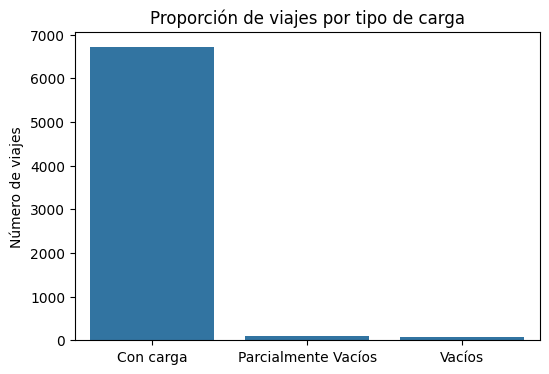

In [38]:
# Gráfico de viajes vacíos, parcialmente vacíos y con carga
plt.figure(figsize=(6,4))
sns.barplot(x=["Con carga", "Parcialmente Vacíos", "Vacíos"], y=[total_trips - empty_trip_count - partial_empty_trip_count, partial_empty_trip_count, empty_trip_count])
plt.title("Proporción de viajes por tipo de carga")
plt.ylabel("Número de viajes")
plt.show()

In [39]:
# Función para determinar si un viaje es "Vacío" o "Con Carga"
def es_viaje_vacio(material):
    if pd.isna(material) or material.lower() == 'empty bin':
        return 'Vacío'
    else:
        return 'Con Carga'

# Aplicar la función a la columna 'Material Shipped' para crear la columna 'Tipo de Viaje'
df['Tipo de Viaje'] = df['Material Shipped'].apply(es_viaje_vacio)

# Contar la frecuencia de cada tipo de viaje
conteo_tipos_viaje = df['Tipo de Viaje'].value_counts()

# Imprimir el resultado
print("Conteo de tipos de viaje:\n")
print(conteo_tipos_viaje.to_markdown(numalign="left", stralign="left"))

# Filtrar el DataFrame para obtener solo los viajes vacíos
viajes_vacios = df[df['Tipo de Viaje'] == 'Vacío']

# Imprimir los detalles de los primeros 10 viajes vacíos
if len(viajes_vacios) > 0:
    print("\nPrimeros 10 viajes vacíos:\n")
    print(viajes_vacios.head(10).to_markdown(index=False, numalign="left", stralign="left"))
else:
    print("\nNo hay viajes vacíos en el dataset.")

Conteo de tipos de viaje:

| Tipo de Viaje   | count   |
|:----------------|:--------|
| Con Carga       | 6815    |
| Vacío           | 65      |

Primeros 10 viajes vacíos:

| BookingID          | Market/Regular    | vehicle_no   | Origin_Location                                          | Destination_Location                                     | Planned_ETA                | actual_eta                 | ontime   | OriginLocation_Code   | trip_start_date   | trip_end_date   | TRANSPORTATION_DISTANCE_IN_KM   | vehicleType                 | Minimum_kms_to_be_covered_in_a_day   | Driver_Name     | customerID   | customerNameCode                         | supplierID   | supplierNameCode              | Material Shipped   | Booking_Date   | Booking_Time   | Org_Lat   | Org_Lon   | Des_Lat   | Des_Lon   | Is_Empty   | Delay    | Distance   | Tipo de Viaje   |
|:-------------------|:------------------|:-------------|:---------------------------------------------------------|:----------------

In [40]:
# Rutas más frecuentes
top_routes = df.groupby(["Origin_Location", "Destination_Location"]).size().reset_index(name="Count")
top_routes = top_routes.sort_values(by="Count", ascending=False).head(10)

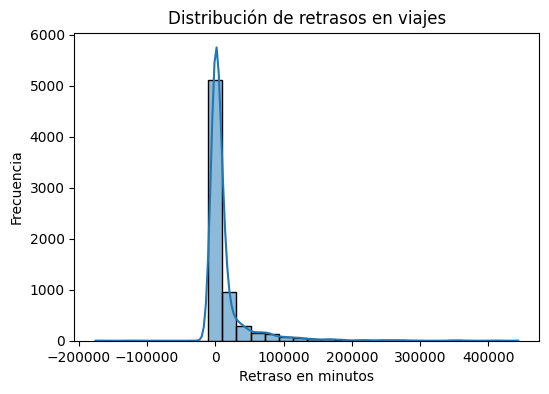

In [41]:
# Gráfico de retrasos
plt.figure(figsize=(6,4))
sns.histplot(df["Delay"].dropna(), bins=30, kde=True)
plt.title("Distribución de retrasos en viajes")
plt.xlabel("Retraso en minutos")
plt.ylabel("Frecuencia")
plt.show()

In [42]:
# Mostrar resultados
print(f"Total de viajes: {total_trips}")
print(f"Viajes vacíos: {empty_trip_count} ({empty_trip_percentage:.2f}%)")
print(f"Viajes parcialmente vacíos: {partial_empty_trip_count} ({partial_empty_trip_percentage:.2f}%)")
print(f"Viajes con retrasos: {len(delayed_trips)}")

Total de viajes: 6880
Viajes vacíos: 65 (0.94%)
Viajes parcialmente vacíos: 94 (1.37%)
Viajes con retrasos: 4315


In [43]:
# Contar la frecuencia de los valores en la columna 'Material Shipped'
material_counts = df['Material Shipped'].value_counts()

# Obtener el material más frecuente
most_common_material = material_counts.index[0]
most_common_count = material_counts.iloc[0]

In [44]:
# Imprimir el resultado
print(f"El material más transportado es: {most_common_material} con {most_common_count} envíos.")

El material más transportado es: AUTO PARTS con 1510 envíos.


In [45]:
# Convertir la columna 'Booking_Date' a datetime
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'])

# Extraer el mes de la columna 'Booking_Date'
df['Month'] = df['Booking_Date'].dt.month_name()

# Contar la frecuencia de cada mes
month_counts = df['Month'].value_counts().reset_index()
month_counts.columns = ['Month', 'Count']

# Imprimir los meses con más reservas
print("Meses con más reservas:\n")
print(month_counts.to_markdown(index=False, numalign="left", stralign="left"))

Meses con más reservas:

| Month     | Count   |
|:----------|:--------|
| August    | 1679    |
| July      | 1062    |
| June      | 665     |
| November  | 643     |
| October   | 536     |
| December  | 525     |
| May       | 446     |
| January   | 358     |
| March     | 308     |
| September | 305     |
| April     | 285     |
| February  | 68      |
